# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [1]:
#Your code here 
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def key_check(data):
    
    for level in data.keys():
        
        print(level, type(data[level]))
        if type(data[level]) == dict:
            print('-------',level,'dict')
            
            key_check(data[level])
        if  type(data[level]) == list:
            print('-------', level, 'list', type(data[level][0]), len(data[level]), len(data[level][0]))
           
        

    

In [2]:
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [3]:
data.keys()

dict_keys(['meta', 'data'])

In [4]:
print(type(data))

<class 'dict'>


#### meta

In [5]:
key_check(data)

meta <class 'dict'>
------- meta dict
view <class 'dict'>
------- view dict
id <class 'str'>
name <class 'str'>
attribution <class 'str'>
attributionLink <class 'str'>
averageRating <class 'int'>
category <class 'str'>
createdAt <class 'int'>
description <class 'str'>
displayType <class 'str'>
downloadCount <class 'int'>
hideFromCatalog <class 'bool'>
hideFromDataJson <class 'bool'>
indexUpdatedAt <class 'int'>
licenseId <class 'str'>
newBackend <class 'bool'>
numberOfComments <class 'int'>
oid <class 'int'>
provenance <class 'str'>
publicationAppendEnabled <class 'bool'>
publicationDate <class 'int'>
publicationGroup <class 'int'>
publicationStage <class 'str'>
rowClass <class 'str'>
rowsUpdatedAt <class 'int'>
rowsUpdatedBy <class 'str'>
tableId <class 'int'>
totalTimesRated <class 'int'>
viewCount <class 'int'>
viewLastModified <class 'int'>
viewType <class 'str'>
columns <class 'list'>
------- columns list <class 'dict'> 42 8
grants <class 'list'>
------- grants list <class 'dict'>

In [6]:
df = pd.DataFrame(data['meta']['view']['columns'])
col= df.name
df


,cachedContents,dataTypeName,description,fieldName,flags,format,id,name,position,renderTypeName,subColumnTypes,tableColumnId,width
0,NaN,meta_data,NaN,:sid,[hidden],{},-1,sid,0,meta_data,NaN,NaN,NaN
1,NaN,meta_data,NaN,:id,[hidden],{},-1,id,0,meta_data,NaN,NaN,NaN
2,NaN,meta_data,NaN,:position,[hidden],{},-1,position,0,meta_data,NaN,NaN,NaN
3,NaN,meta_data,NaN,:created_at,[hidden],{},-1,created_at,0,meta_data,NaN,NaN,NaN
4,NaN,meta_data,NaN,:created_meta,[hidden],{},-1,created_meta,0,meta_data,NaN,NaN,NaN
5,NaN,meta_data,NaN,:updated_at,[hidden],{},-1,updated_at,0,meta_data,NaN,NaN,NaN
6,NaN,meta_data,NaN,:updated_meta,[hidden],{},-1,updated_meta,0,meta_data,NaN,NaN,NaN
7,NaN,meta_data,NaN,:meta,[hidden],{},-1,meta,0,meta_data,NaN,NaN,NaN
8,"{'largest': '2016', 'non_null': 519718, 'avera...",number,Starting Year\n,yearstart,NaN,"{'precisionStyle': 'standard', 'noCommas': 'tr...",360864928,YearStart,1,number,NaN,36246792.0,208.0
9,"{'largest': '2016', 'non_null': 519718, 'avera...",number,Ending Year\n,yearend,NaN,"{'precisionStyle': 'standard', 'noCommas': 'tr...",360864929,YearEnd,2,number,NaN,36246793.0,184.0


#### data

In [7]:
type(data['data'][0])

list

In [8]:
print(len(data['data'][0]), len(data['data'][-1]))

42 42


## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [9]:
df = pd.DataFrame(data['data'], columns=col)


In [10]:
np.array(df.DataValue)

array(['16.9', '13', '18.2', ..., None, None, None], dtype=object)

In [11]:
a = df.loc[(df.Topic == 'Asthma')]
a.LocationAbbr.value_counts()

AZ    86
NE    86
NC    86
MT    86
OR    86
MA    86
CT    86
SD    86
DC    86
CO    86
PA    86
NM    86
GU    86
LA    86
ME    86
AK    86
FL    86
MI    86
WA    86
KY    86
NY    86
NJ    86
WY    86
AL    86
AR    86
OK    86
VI    86
MS    86
IA    86
CA    86
OH    86
IN    86
VA    86
VT    86
DE    86
MN    86
SC    86
PR    86
NH    86
TN    86
ID    86
KS    86
IL    86
NV    86
UT    86
WI    86
HI    86
TX    86
ND    86
GA    86
WV    86
MD    86
MO    86
RI    86
US    31
Name: LocationAbbr, dtype: int64

In [12]:
a.columns


Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object', name='name')

In [13]:

a.LocationAbbr.loc[(a.Question == 'Current asthma prevalence among adults aged >= 18 years') &
                              (a.StratificationCategory1 == 'Overall') & (a.DataValueTypeID == 'CRDPREV')].value_counts()

GA    1
CA    1
UT    1
PR    1
NY    1
NJ    1
GU    1
WV    1
TN    1
WY    1
KS    1
ID    1
MT    1
NV    1
NH    1
AL    1
US    1
NE    1
MA    1
AR    1
WI    1
MS    1
HI    1
LA    1
TX    1
RI    1
NM    1
KY    1
WA    1
AZ    1
CT    1
OK    1
MD    1
MO    1
IL    1
SD    1
OR    1
IA    1
MI    1
VI    1
DC    1
AK    1
VA    1
ME    1
FL    1
OH    1
IN    1
NC    1
DE    1
VT    1
CO    1
PA    1
MN    1
SC    1
ND    1
Name: LocationAbbr, dtype: int64

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [14]:
df1 = a[['LocationAbbr', 'DataValue']].loc[(a.Question == 'Current asthma prevalence among adults aged >= 18 years') &
                              (a.StratificationCategory1 == 'Overall') & (a.DataValueTypeID == 'CRDPREV')]

In [15]:
df1.DataValue = df1.DataValue.astype(float)
df1 = df1.sort_values('DataValue')

In [28]:
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

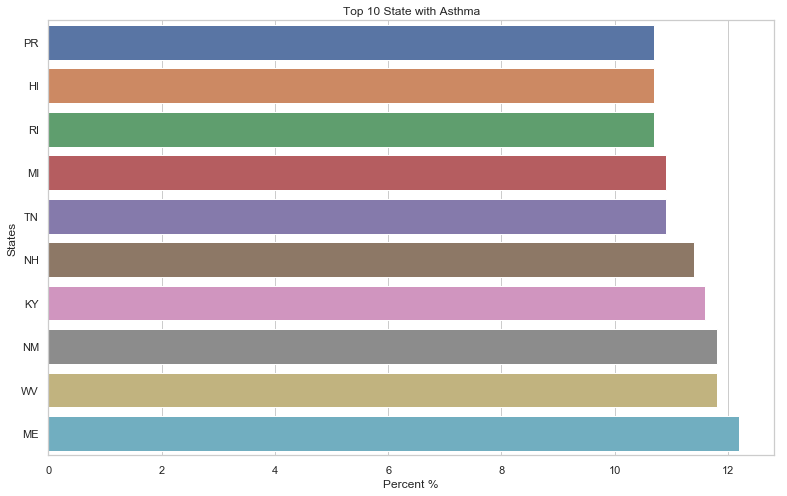

In [33]:
ax =plt.figure(figsize=(13,8));
ax = plt.title('Top 10 State with Asthma')
ax =plt.ylabel('States')
ax = plt.xlabel('Percent')
sns.set(style="whitegrid")

tips = df1.iloc[-10:]
ax = sns.barplot(x="DataValue",y ="LocationAbbr", data=tips)
ax =plt.ylabel('States')
ax = plt.xlabel('Percent %')

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width="350">

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [18]:
# Your code here; you will probably want to define subfunctions.
def print_obj_outline(json_obj):
    return outline

In [19]:
outline = print_obj_outline(data)

NameError: name 'outline' is not defined

In [ ]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 